## Healthcare Project(OTAMIRI CONFIDENCE)

In [1]:
#IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import datetime

sns.set_theme(color_codes=True)

In [2]:
#LOADING THE DATASET
data = pd.read_excel("healthcare.xlsx")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#ACCESSING THE FEATURES OF THE DATASET
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#CHECKING FOR MISSING VALUES IN THE DATASET
data.isna().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [62]:
#CHECKING FOR DUPLICATE VALUES
data.index.duplicated().sum()

0

In [63]:
#SUMMARY STATISTICS OF THE DATA
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [66]:
#CHECKING DATA TYPES OF VARIABLES
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [64]:
#SELECTING CATEGORICAL VARIABLES - however, this dataset looks preprocessed
data_cat = data.select_dtypes(exclude=[np.number])
data_catcol = data_cat.columns.to_list()

print("categorical:",data_catcol)

categorical: []


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

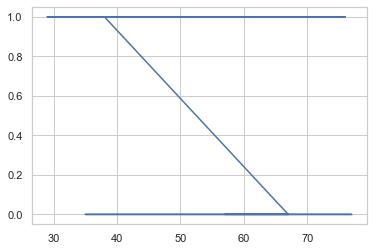

In [68]:
#Study the occurrence of CVD across the Age category
age = data['age']
target = data['target']
plt.plot(age,target)
plt.grid

Text(0.5, 1.0, 'Cardiovascular risk')

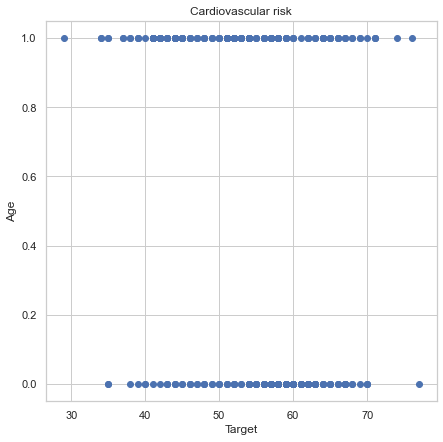

In [69]:
plt.figure(figsize=(7,7))
plt.scatter(x='age',y='target',data=data)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Cardiovascular risk')

<AxesSubplot:xlabel='sex', ylabel='count'>

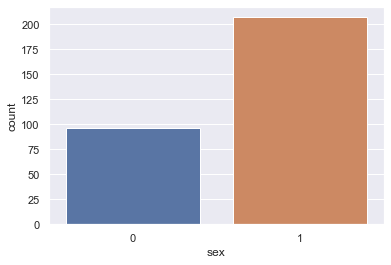

In [8]:
#the composition of all patients with respect to the Sex category
sns.countplot(data=data, x='sex')

<AxesSubplot:xlabel='sex', ylabel='age'>

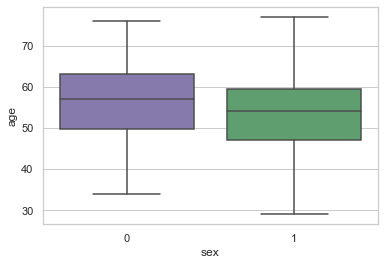

In [79]:
sns.boxplot(x="sex", y="age",
palette=["m", "g"], data=data)

Text(0.5, 1.0, 'Cardiovascular risk')

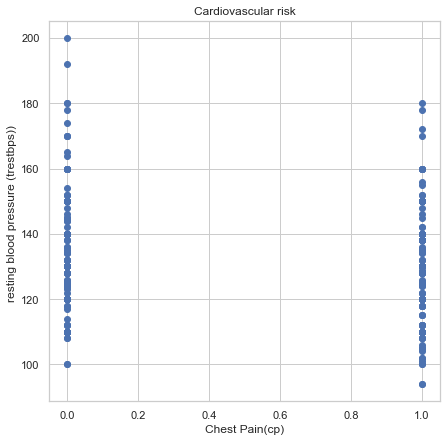

In [78]:
#heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
plt.figure(figsize=(7,7))
plt.scatter(x='target',y='trestbps',data=data)
plt.xlabel('Chest Pain(cp)')
plt.ylabel('resting blood pressure (trestbps)) ')
plt.title('Cardiovascular risk')

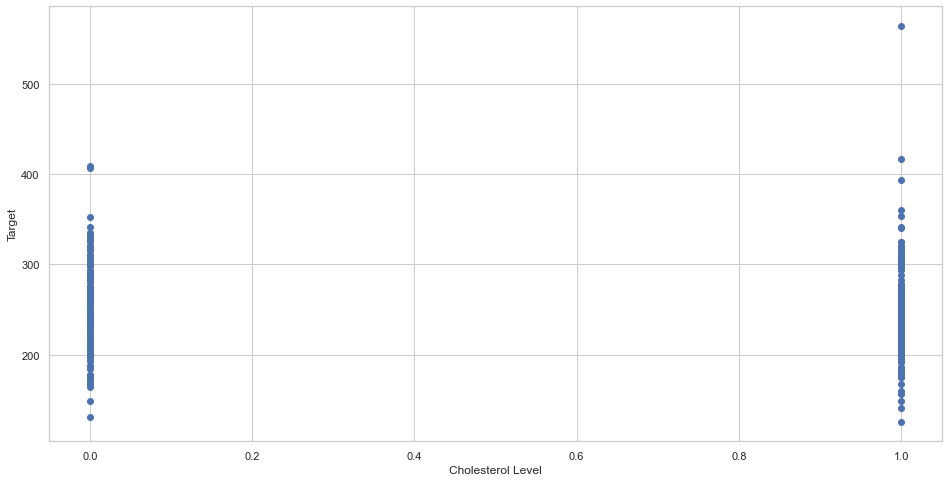

In [18]:
#Relationship between cholesterol levels and a target variable

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['target'], data['chol'])
ax.set_xlabel('Cholesterol Level')
ax.set_ylabel('Target')
plt.show()

In [19]:
data_cat=data[['chol','target','slope','exang']]
data_cat


,chol,target,slope,exang
0,233,1,0,0
1,250,1,0,0
2,204,1,2,0
3,236,1,2,0
4,354,1,2,1
...,...,...,...,...
298,241,0,1,1
299,264,0,1,0
300,193,0,1,0
301,131,0,1,1


<AxesSubplot:>

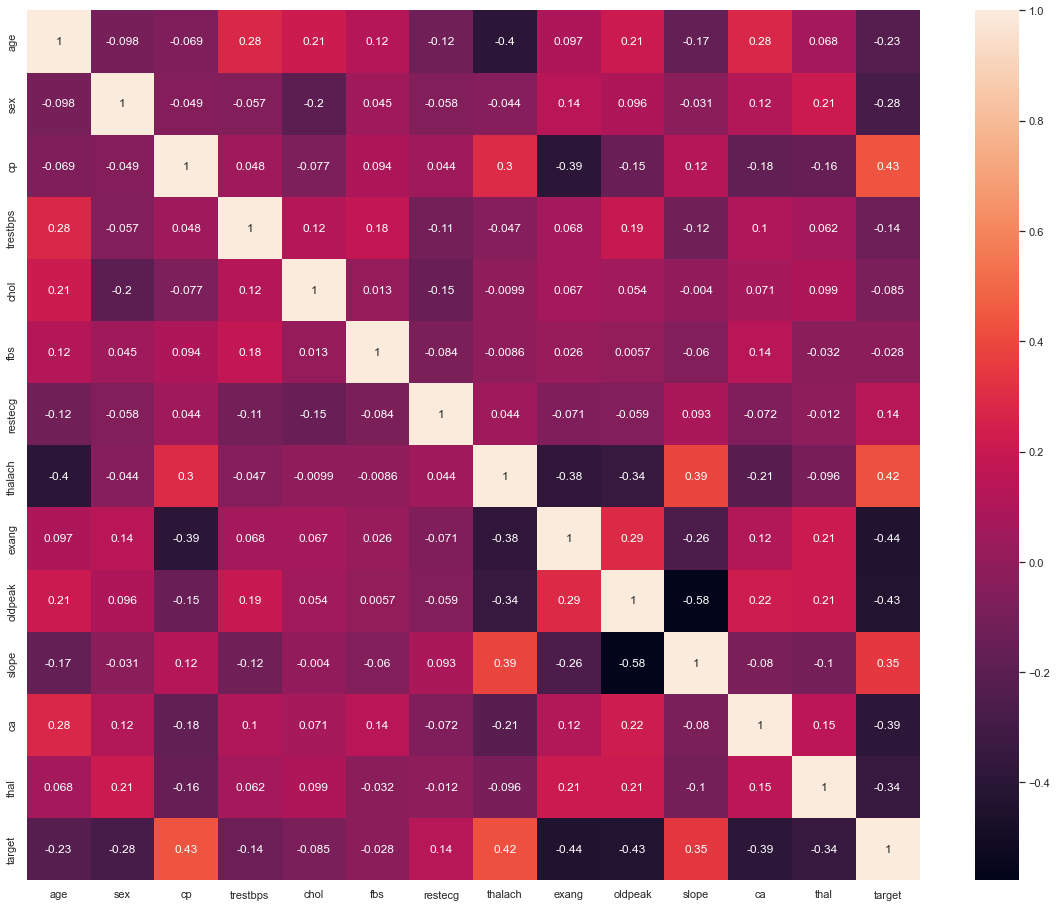

In [20]:
#correlation between cholesterol levels and a target variable
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

In [80]:
#Relationship exists between peak exercising and the occurrence of a heart attack
print(data[["chol","target"]].corr())
print()
print(data[["slope","exang"]].corr())


            chol    target
chol    1.000000 -0.085239
target -0.085239  1.000000

          slope     exang
slope  1.000000 -0.257748
exang -0.257748  1.000000

            thal    target
thal    1.000000 -0.344029
target -0.344029  1.000000


In [81]:
#Checking if thalassemia is a major cause of CVD
print()
print(data[["thal","target"]].corr())
print()


            thal    target
thal    1.000000 -0.344029
target -0.344029  1.000000



In [83]:
#List how the other factors determine the occurrence of CVD[]
print()
print(data[["cp","fbs","sex","chol","target"]].corr())
print()
print(data[["age","ca","oldpeak","exang","thalach","target"]].corr())
print()


              cp       fbs       sex      chol    target
cp      1.000000  0.094444 -0.049353 -0.076904  0.433798
fbs     0.094444  1.000000  0.045032  0.013294 -0.028046
sex    -0.049353  0.045032  1.000000 -0.197912 -0.280937
chol   -0.076904  0.013294 -0.197912  1.000000 -0.085239
target  0.433798 -0.028046 -0.280937 -0.085239  1.000000

              age        ca   oldpeak     exang   thalach    target
age      1.000000  0.276326  0.210013  0.096801 -0.398522 -0.225439
ca       0.276326  1.000000  0.222682  0.115739 -0.213177 -0.391724
oldpeak  0.210013  0.222682  1.000000  0.288223 -0.344187 -0.430696
exang    0.096801  0.115739  0.288223  1.000000 -0.378812 -0.436757
thalach -0.398522 -0.213177 -0.344187 -0.378812  1.000000  0.421741
target  -0.225439 -0.391724 -0.430696 -0.436757  0.421741  1.000000



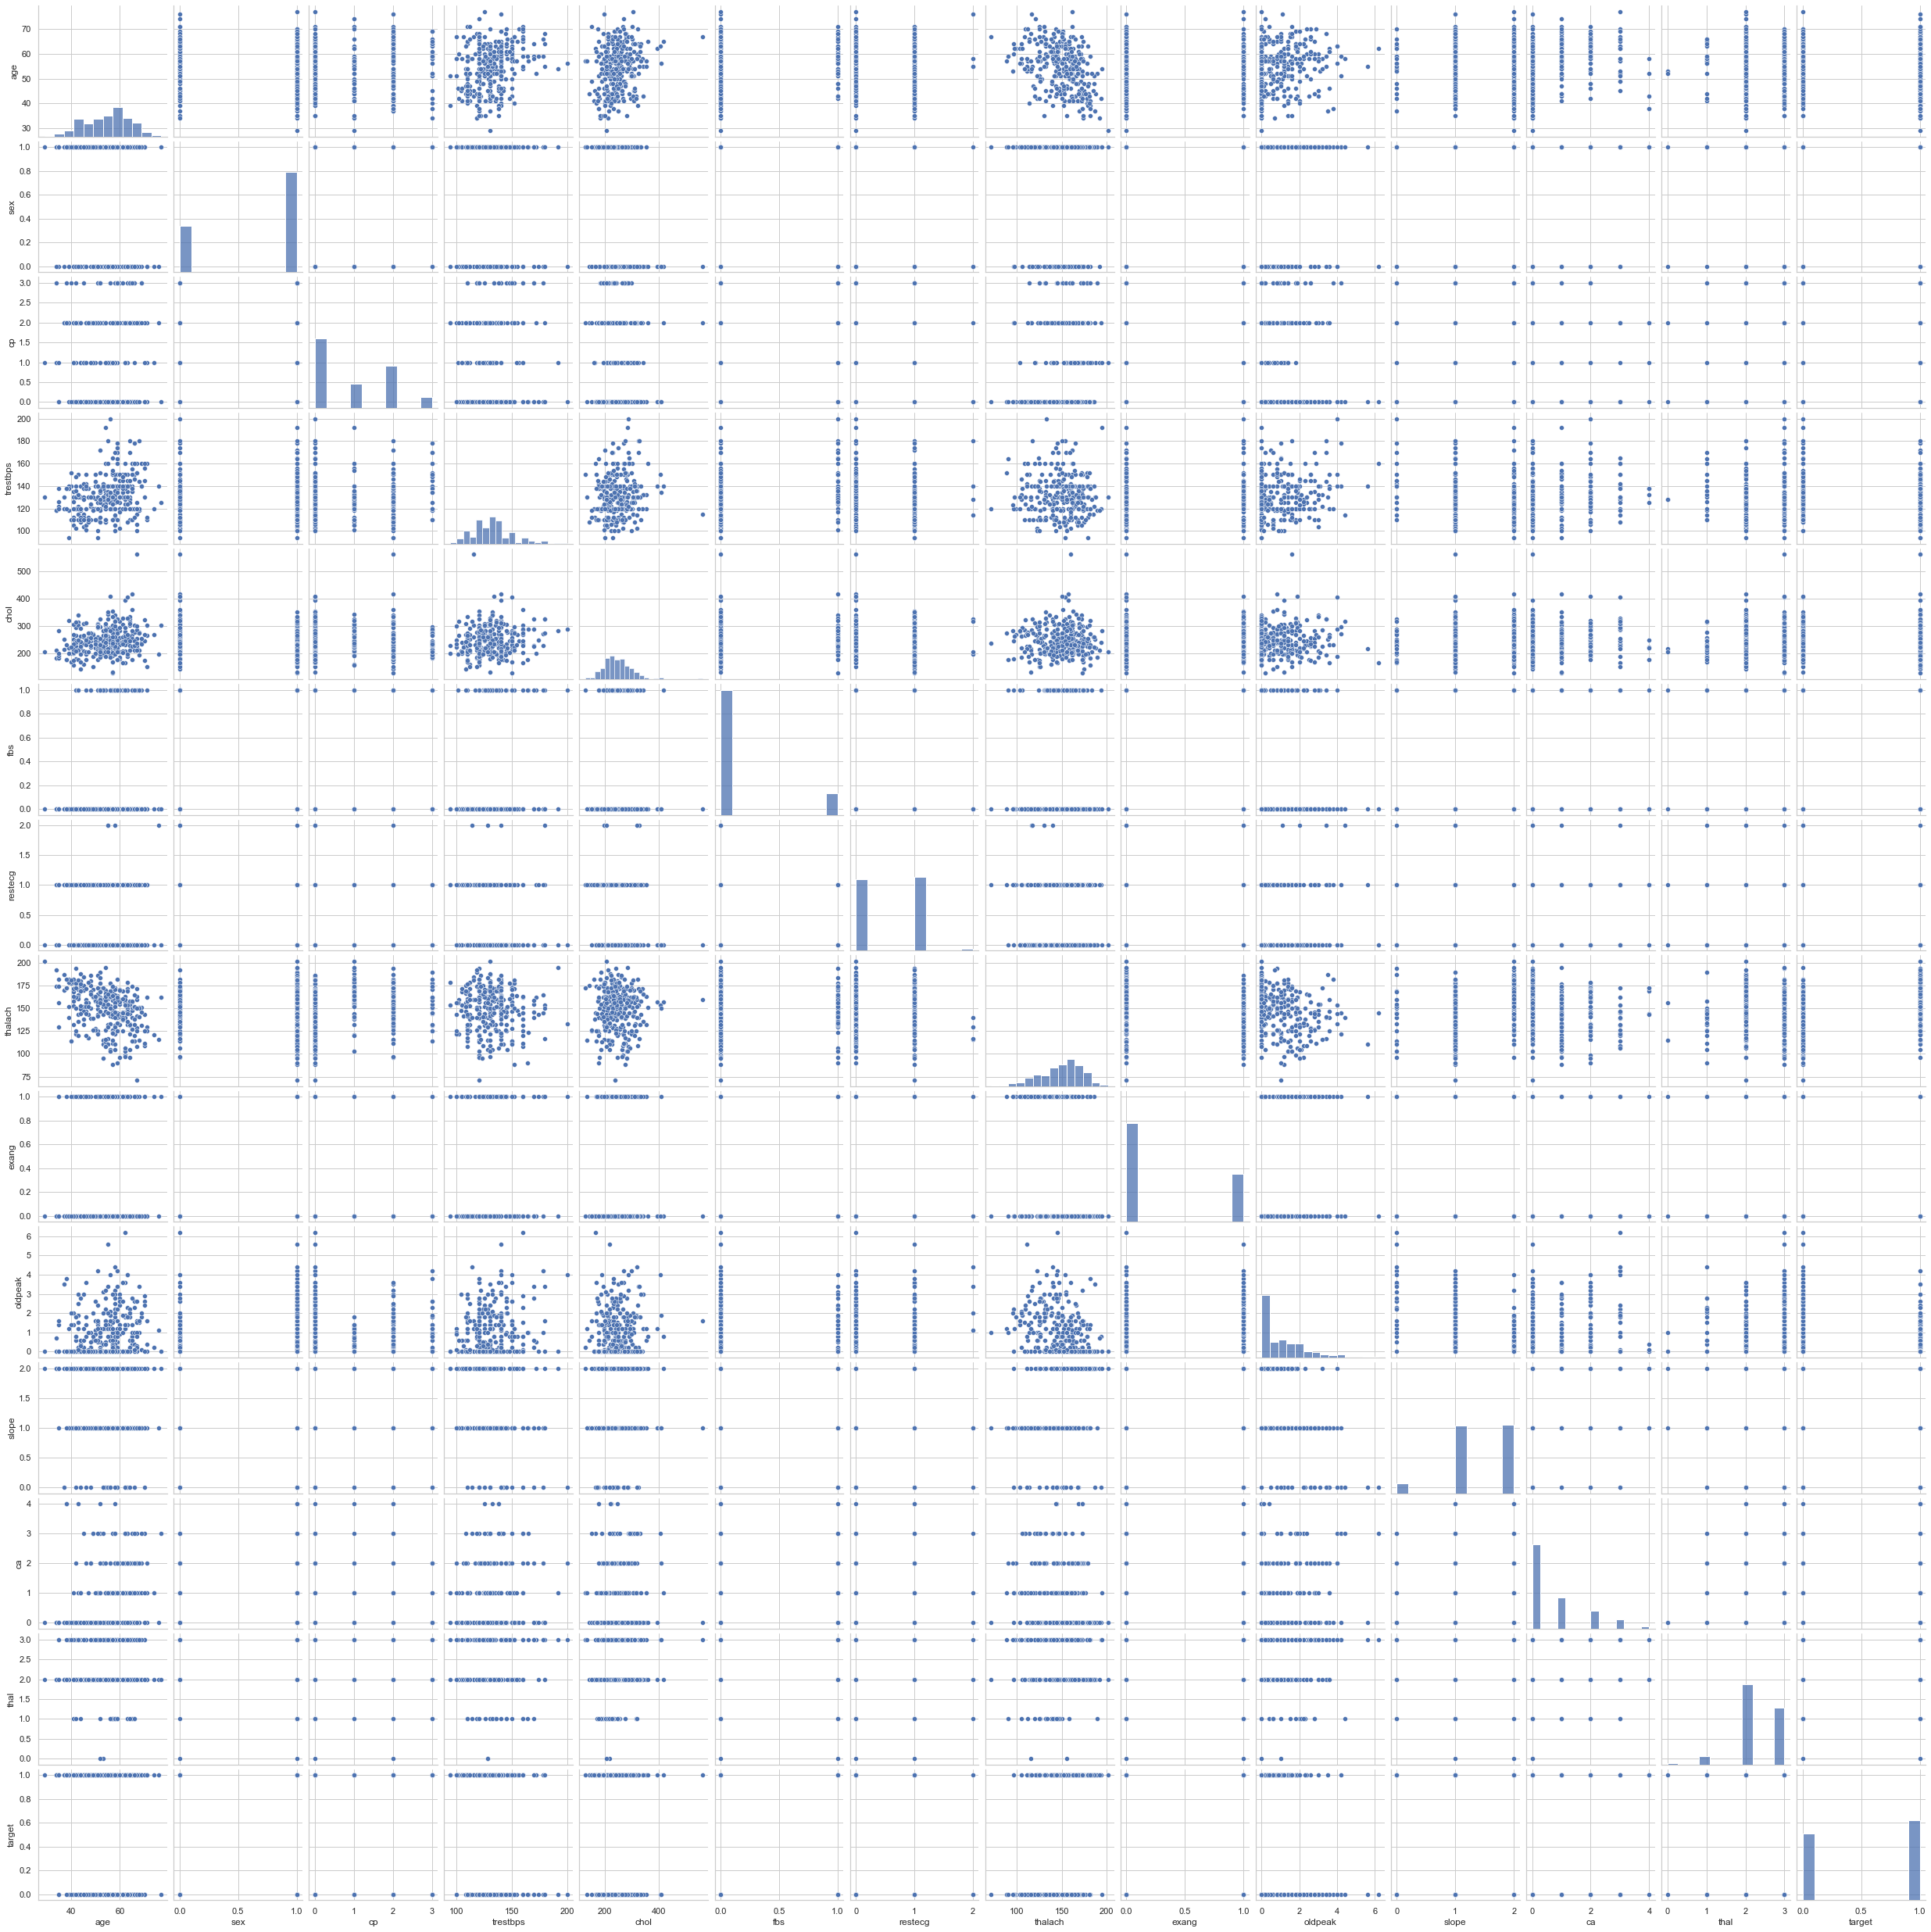

In [84]:
#pair plot to understand the relationship between all the given variables
sns.pairplot(data)

In [23]:
#Building Baseline Model Usine Logistic regression and Random Forest classifier

#importing libraries for Logistics regressiom
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [24]:
data.shape

(303, 14)

In [25]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [30]:
features = ['sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
x = data[features].values
y = data['target']

In [32]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 12)
(91, 12)
(212,)
(91,)


In [34]:
LogReg = LogisticRegression()

In [35]:
LogReg.fit(x_train,y_train)

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = LogReg.predict(x_test)

In [37]:
metrics.confusion_matrix(y_test,y_pred)

array([[33, 17],
       [ 3, 38]], dtype=int64)

In [38]:
metrics.accuracy_score(y_test,y_pred)

0.7802197802197802

In [39]:
len(x_test)

91

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77        50
           1       0.69      0.93      0.79        41

    accuracy                           0.78        91
   macro avg       0.80      0.79      0.78        91
weighted avg       0.81      0.78      0.78        91



In [42]:
LogReg.coef_

array([[-1.46621848,  0.85243735, -0.01656242, -0.00555728, -0.13612252,
         0.24986196,  0.03136951, -0.83385029, -0.29353726,  0.7725202 ,
        -0.75275476, -0.3333778 ]])

In [43]:
LogReg.intercept_

array([0.05628101])

In [44]:
LogReg.predict_log_proba(x_test)

array([[-0.05594537, -2.91122181],
       [-1.05274405, -0.4292131 ],
       [-0.39557162, -1.11869783],
       [-1.45255622, -0.26653583],
       [-0.10308355, -2.32331452],
       [-1.44361196, -0.26928374],
       [-1.59301157, -0.22729265],
       [-1.33935936, -0.30382971],
       [-2.14952879, -0.1239082 ],
       [-0.10190953, -2.33419188],
       [-3.45210656, -0.03219146],
       [-0.05452236, -2.93628167],
       [-1.10037328, -0.40458578],
       [-1.02516779, -0.44431447],
       [-0.10400498, -2.31486829],
       [-0.79190105, -0.60327509],
       [-0.01129773, -4.48879721],
       [-0.00979368, -4.6309107 ],
       [-2.91235759, -0.05588006],
       [-0.13574298, -2.0640959 ],
       [-0.03548829, -3.35624408],
       [-2.19755195, -0.11774212],
       [-1.22184246, -0.3491132 ],
       [-2.78543307, -0.06368807],
       [-0.08384885, -2.52037101],
       [-0.06183637, -2.81402245],
       [-0.01063666, -4.54876248],
       [-0.17493132, -1.82955278],
       [-3.50573513,

In [48]:
#Using Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [49]:
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

0.7912087912087912


In [52]:
import statsmodels.api as sm
import pandas as pd

# Add constant to independent variables
X = sm.add_constant(x)

# Fit logistic regression model
logit_model = sm.Logit(y, x).fit()

# Print summary of model results
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.352680
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      291
Method:                           MLE   Df Model:                           11
Date:                Wed, 07 Jun 2023   Pseudo R-squ.:                  0.4883
Time:                        20:01:48   Log-Likelihood:                -106.86
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.146e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6387      0.449     -3.649      0.000      -2.519      -0.759
x2             0.8478      0.

In [53]:
#correlation analysis of the independent variables
import statsmodels.api as sm
import pandas as pd

# Calculate correlation matrix
corr_matrix = data.corr()

# Print correlation matrix
print(corr_matrix)


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03